In [1]:
import seaborn as sns
import random
import numpy as np
from matplotlib import pyplot as plt


import pickle

In [139]:
file = './Daniel_impedance/errors_big_peg_pd'
name = file + '.pkl'
with open(name, 'rb') as f:
    loaded_dict = pickle.load(f)
    
print()
success = np.array(loaded_dict.get('success'))
errors = np.array(loaded_dict.get('error'))

peg_radius = 4/1000
hole_radius = 5/1000

r_low = 2.5/1000
r_high = 2.5/1000
R_hole = hole_radius
R_peg = peg_radius
theta = np.linspace(0, 2*np.pi, 1000)
x_hole = R_hole*np.cos(theta)
y_hole = R_hole*np.sin(theta)
x_peg = R_peg*np.cos(theta)
y_peg = R_peg*np.sin(theta)
x_low = r_low*np.cos(theta)
y_low = r_low*np.sin(theta)
x_high = r_high*np.cos(theta)
y_high = r_high*np.sin(theta)



In [140]:
np.where(success==False)

(array([ 0,  1,  3,  5,  6, 10, 12, 13, 19, 21, 22, 24, 26, 27, 28, 29, 31,
        33, 34, 35, 36, 37, 42, 43, 44, 45, 46, 48, 49, 50, 51, 53, 54, 55,
        56, 60, 61, 62, 63, 64, 65, 66, 69, 72, 73, 74, 75, 76, 77, 78, 79,
        81, 84, 86, 87, 89, 90, 92, 93, 94, 95, 96, 98]),)

In [141]:
error_mag=np.sqrt(errors[:,0]**2+errors[:,1]**2)

In [142]:
error_mag[13]

0.0025

In [143]:
success.sum()

37

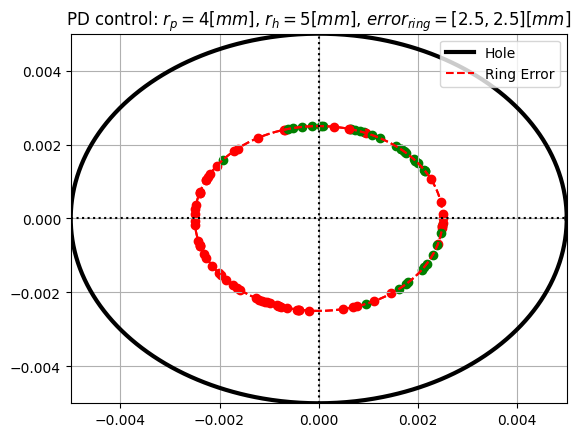

In [144]:

plt.figure()
plt.title('PD control: $r_p=4[mm]$, $r_h=5[mm]$, $error_{ring}=[2.5, 2.5][mm]$')
# plt.plot(x_peg, y_peg, color='k', label='hole', linewidth=3)
plt.plot(x_hole, y_hole, color='k', label='Hole', linewidth=3)
plt.plot(x_low, y_low, color='r', linestyle='dashed', label='Ring Error')
plt.plot(x_high, y_high, color='r', linestyle='--')
plt.axhline(y=0, color='k', linestyle='dotted')
plt.axvline(x=0, color='k', linestyle='dotted')
for i in range(len(errors)):
    err = errors[i]
    suc = success[i]
    if suc:
        plt.scatter(err[0], err[1], c='green',zorder=1)
    else:
        plt.scatter(err[0], err[1], c='red',zorder=1)
#         print(f'Unsuccessful insertion for: {err[:2]*1000}mm')
val = 0.005
plt.xlim(-val, val)
plt.ylim(-val, val)
plt.legend(loc='upper right')
plt.grid()
plt.show()



# plt.figure()
# plt.title(': 100 eval ep: ring error: [0.6, 0.8]')
# plt.plot(x_hole, y_hole, color='k', label='hole', linewidth=3)
# plt.plot(x_low, y_low, color='r', linestyle='dashed')
# plt.plot(x_high, y_high, color='r', linestyle='--')
# plt.axhline(y=0, color='k', linestyle='dotted')
# plt.axvline(x=0, color='k', linestyle='dotted')
# for i in range(100):
#     r = random.uniform(r_low, r_high)
#     # print('radial error in [mm]', r*1000)
#     theta = random.uniform(np.pi, 1.5 * np.pi)
#     x_error = r * np.cos(theta)
#     y_error = r * np.sin(theta)
#     plt.scatter(x_error, y_error, c='b')
#
# plt.grid()
# plt.show()

In [96]:
# success = np.array([ False,  True,  True,  True,  True,  True,  True,  True,  True,
#         False,  True,  True,  False, False,  True,  True,  True,  True,
#         True,  True,  True,  True,  True,  True,  True, False,  True,
#         False,  True,  True,  True,  True, False,  True,  True,  True,
#        False,  True, False,  False,  True,  True,  True,  True,  True,
#         True,  True,  True,  True,  True,  True,  True,  True,  True,
#         True, False,  True,  True,  True,  True, False,  True,  True,
#         True,  True,  True,  True,  True,  True,  True,  True,  True,
#         True,  True,  True,  True,  True,  True,  True,  True,  True,
#         True,  True,  True,  True,  True,  True,  True,  True,  True,
#         True,  True,  True,  True,  False,  True,  False,  True,  True,
#         True])